In [22]:
"""
Tugas Kelompok 7 DTS 2019
"""

'\nTugas Kelompok 7 DTS 2019\n'

In [23]:
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import urllib
from bs4 import BeautifulSoup
import requests
import nltk
import re
import numpy as np
from nltk.probability import FreqDist
from nltk import ngrams
from wordcloud import WordCloud
from nltk.corpus import brown

In [24]:
with open ("debat2.txt", encoding = 'utf-8', errors='ignore') as f:
    debat = f.read()
debat = debat.lower()

In [25]:
'''Get the summary of the text'''

def get_summary(debat, pct):
    summary = summarize(debat,ratio=pct,split=True)
    return summary

'''Get the keywords of the text'''

def get_keywords(debat):
    res = keywords(debat, ratio=0.1, words=None, split=False, scores=False, pos_filter=('NN', 'JJ'), lemmatize=False, deacc=False)
    res = res.split('\n')
    return res

'''Tokenize the sentence into words & remove punctuation'''

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def split_sentences(text):
    """ Split text into sentences.
    """
    sentence_delimiters = re.compile(u'[\\[\\]\n.!?]')
    sentences = sentence_delimiters.split(text)
    return sentences

def split_into_tokens(text):
    """ Split text into tokens.
    """
    tokens = nltk.word_tokenize(debat)
    return tokens
    
def POS_tagging(text):
    """ Generate Part of speech tagging of the text.
    """
    POSofText = nltk.tag.pos_tag(text)
    return POSofText

def extract_title_text(url):
    page = urllib.request.urlopen(url).read().decode('utf8')
    soup = BeautifulSoup(page,'lxml')
    text = ' '.join(map(lambda p: p.text, soup.find_all('p')))
    return soup.title.text, text

def get_lemmatize(text):
    lem = WordNetLemmatizer()
    nLem = [] 
    for i in text:
        nLem.append(lem.lemmatize(i, 'v'))
    return nLem

def get_stop_words(text):
    stop_words = set(stopwords.words('english'))
    filtered = [i for i in text if not i in stop_words]
    return filtered

def remove_punctuation(text):
    punct = re.compile(r'[-.?!,:;()%|0-9]')
    rem_punct = []
    for i in text:
        word = punct.sub("", i)
        if len(word) > 0:
            rem_punct.append(word)
    return rem_punct

def get_fdist(text):
    fdist= FreqDist()
    for i in text:
        fdist[i.lower()]+=1
    return fdist

def get_normalize(text):
    my_new_text = re.sub('[^ a-zA-Z0-9]', '', text)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(str(my_new_text)) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    lemma = WordNetLemmatizer()
    normalized = " ".join(lemma.lemmatize(word)for word in filtered_sentence)
    return normalized

def get_nGram(text):
    n = 5
    total_grams = []
    number_of_grams = ngrams(normalized.split(), n)
    for grams in number_of_grams:
        total_grams.append(grams)
    return total_grams

def show_wordcloud(text):
    wordcloud = WordCloud(max_font_size=60).generate(normalized)
    plt.figure(figsize=(16,12))
    '''plot wordcloud in matplotlib'''
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
def get_frequency(text, jmlKata):
    count = {}
    for w in normalized.split():
        if w in count:
            count[w] += 1
        else:
            count[w] = 1
    topics.clear()
    for word, times in count.items():
        if times > jmlKata:
            freq = print("%s was found %d times" % (word, times))
            topics.append(word)
    return freq
topics=[] 
def get_dispersion(text):
    cfd = nltk.ConditionalFreqDist((genre, word)
                                   for genre in brown.categories() 
                                   for word in brown.words(categories=genre))
    genres = ['adventure', 'belles_lettres', 
              'editorial', 'fiction', 'government', 
              'hobbies','humor', 'learned', 'lore', 
              'mystery', 'news', 'religion', 'reviews', 
              'romance','science_fiction']
    a=cfd.tabulate(conditions=genres, samples = topics)

In [26]:
summary = get_summary(debat, 0.3)
summary

['for four and a half years i with pak jusuf kalla have tried hard to have struggled in order to restore the original character of development in our country indonesia, which is not relying on economic growth alone but also relying on equity because economic growth without equality is a good inequality that is inequality between rich and poor inequality between regions and will also cause what is called injustice.',
 'therefore we build infrastructure not in java alone not java centric but indonesia centric for what with infrastructure infrastructure we want there to be new economic growth points outside of java in the form of small industrial zones in the form of special economic zones in the form of special economic zones for tourism which it will also have an effect on handicrafts produced by villages and we also want to continue to fight for the independence of the indonesian economy, therefore strategic natural resources previously managed by foreigners are controlled by the state

In [27]:
split_sentences(debat)

['for four and a half years i with pak jusuf kalla have tried hard to have struggled in order to restore the original character of development in our country indonesia, which is not relying on economic growth alone but also relying on equity because economic growth without equality is a good inequality that is inequality between rich and poor inequality between regions and will also cause what is called injustice',
 ' therefore we build infrastructure not in java alone not java centric but indonesia centric for what with infrastructure infrastructure we want there to be new economic growth points outside of java in the form of small industrial zones in the form of special economic zones in the form of special economic zones for tourism which it will also have an effect on handicrafts produced by villages and we also want to continue to fight for the independence of the indonesian economy, therefore strategic natural resources previously managed by foreigners are controlled by the state

In [28]:
get_keywords(debat)

['good',
 'goods',
 'tax',
 'taxes',
 'cards',
 'card',
 'industrial',
 'industrialization',
 'industry',
 'economic',
 'economics',
 'trillion',
 'economy',
 'school',
 'schools',
 'indonesia',
 'big',
 'products',
 'productive',
 'production',
 'develop industries',
 'managed',
 'manages',
 'managing',
 'manage',
 'holding',
 'food',
 'program',
 'programs',
 'percent',
 'balance',
 'said',
 'commodity',
 'commodities',
 'build',
 'building',
 'builds',
 'subsidy',
 'micro',
 'means',
 'meaning',
 'development',
 'developing',
 'developed',
 'halal',
 'working',
 'works',
 'work',
 'training trainings',
 'trains',
 'large',
 'field',
 'fields',
 'ecosystem',
 'god',
 'provide',
 'income']

In [29]:
tokens= split_into_tokens(debat)
tokens

['for',
 'four',
 'and',
 'a',
 'half',
 'years',
 'i',
 'with',
 'pak',
 'jusuf',
 'kalla',
 'have',
 'tried',
 'hard',
 'to',
 'have',
 'struggled',
 'in',
 'order',
 'to',
 'restore',
 'the',
 'original',
 'character',
 'of',
 'development',
 'in',
 'our',
 'country',
 'indonesia',
 ',',
 'which',
 'is',
 'not',
 'relying',
 'on',
 'economic',
 'growth',
 'alone',
 'but',
 'also',
 'relying',
 'on',
 'equity',
 'because',
 'economic',
 'growth',
 'without',
 'equality',
 'is',
 'a',
 'good',
 'inequality',
 'that',
 'is',
 'inequality',
 'between',
 'rich',
 'and',
 'poor',
 'inequality',
 'between',
 'regions',
 'and',
 'will',
 'also',
 'cause',
 'what',
 'is',
 'called',
 'injustice',
 '.',
 'therefore',
 'we',
 'build',
 'infrastructure',
 'not',
 'in',
 'java',
 'alone',
 'not',
 'java',
 'centric',
 'but',
 'indonesia',
 'centric',
 'for',
 'what',
 'with',
 'infrastructure',
 'infrastructure',
 'we',
 'want',
 'there',
 'to',
 'be',
 'new',
 'economic',
 'growth',
 'points',


In [30]:
debat_lem = get_lemmatize(tokens)

In [31]:
stopWords=get_stop_words(debat_lem)

In [32]:
remPunct=remove_punctuation(stopWords)

In [33]:
fdist=get_fdist(remPunct)

In [34]:
normalized=get_normalize(debat)

In [35]:
ngram=get_nGram(normalized)

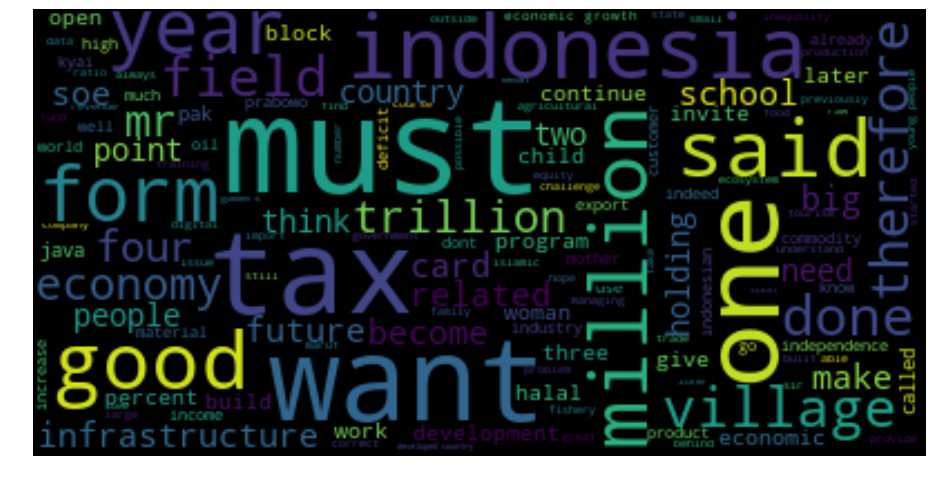

In [36]:
show_wordcloud(normalized)

In [37]:
get_frequency(normalized, 9)

indonesia was found 12 times
also was found 30 times
good was found 10 times
want was found 15 times
must was found 20 times
million was found 10 times
one was found 13 times
tax was found 15 times
said was found 10 times


In [38]:
topics

['indonesia', 'also', 'good', 'want', 'must', 'million', 'one', 'tax', 'said']

In [39]:
get_dispersion(topics)

                indonesia      also      good      want      must   million       one       tax      said 
      adventure         0        19        37        43        27         4       162         0       287 
 belles_lettres         0       179       104        30       170         4       475         5       159 
      editorial         0        43        58        12        53        22       150        22        52 
        fiction         0         7        55        34        55         3       168         1       192 
     government         0        85        25         8       102        55       111        86        18 
        hobbies         0       100        96        27        83         9       258         0        11 
          humor         0        11        11         6         9         3        64         2        87 
        learned         0       215        44        18       202        20       451        19        35 
           lore         0        93  

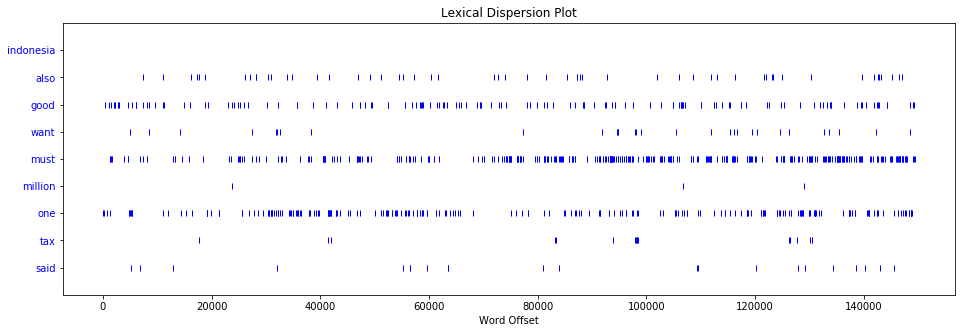

In [40]:
from nltk.book import text4 as content
plt.figure(figsize=(16,5))
content.dispersion_plot(topics)